## Exploratory Data Analysis

In [1]:
# importing of libraries
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
import os,sys
sys.path.append(os.path.abspath(os.path.join('..')))
from scripts.eda import EDA
sns.set()
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.mode.chained_assignment = None  # default='warn'
plt.rcParams["figure.figsize"] = (12, 8)
pd.set_option('display.max_columns', None)

In [2]:
# reading the csv file
train = pd.read_csv("../data/training.csv",index_col=False)
test = pd.read_csv("../data/testing.csv",index_col=False)

In [3]:
eda_train = EDA(train)
eda_test = EDA(test)

## General statistics 

- Id - an Id that represents a (Store, Date) duple within the test set
- Store - a unique Id for each store
- Sales - the turnover for any given day (this is what you are predicting)
- Customers - the number of customers on a given day
- Open - an indicator for whether the store was open: 0 = closed, 1 = open
- StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state 
holidays. Note that all schools are closed on 
public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
- SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
- StoreType - differentiates between 4 different store models: a, b, c, d
- Assortment - describes an assortment level: a = basic, b = extra, c = extended. Read more about assortment here
- CompetitionDistance - distance in meters to the nearest competitor store
- CompetitionOpenSince[Month/Year] - gives the approximate year and month of 
the time the nearest competitor was opened
- Promo - indicates whether a store is running a promo on that day
- Promo2 - Promo2 is a continuing and consecutive promotion for some 
stores: 0 = store is not participating, 1 = store is participating
- Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
- PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion 
is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, 
November of any given year for that store

In [4]:
eda_train.descriptive_stats(size=True)

(324275, 22)

In [5]:
eda_test.descriptive_stats(size=True)

(14832, 20)

In [6]:
# descriptive statistics that summarize the central tendency, dispersion of the df's numerical columns
eda_train.descriptive_stats(describe=True)

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Day,Month,Year,DayOfYear,WeekOfYear
count,324275.000,324275.000,324275.000,324275.000,324275.000,324275.000,324275.000,324275.000,324275.000,324275.000,324275.000,324275.000,324275.000,324275.000,324275.000,324275.000,324275.000,324275.000
mean,558.935,3.999,5395.470,553.712,0.826,0.381,0.175,4284.873,7.191,2008.195,1.000,22.144,2011.856,15.699,5.749,2013.828,159.293,23.204
std,327.250,1.997,3485.730,361.167,0.379,0.486,0.380,5248.863,3.251,7.425,0.000,13.550,1.675,8.786,3.304,0.787,100.923,14.329
min,2.000,1.000,0.000,0.000,0.000,0.000,0.000,40.000,1.000,1900.000,1.000,1.000,2009.000,1.000,1.000,2013.000,1.000,1.000
25%,276.000,2.000,3527.000,369.000,1.000,0.000,0.000,600.000,4.000,2005.000,1.000,13.000,2011.000,8.000,3.000,2013.000,75.000,11.000
50%,563.000,4.000,5466.000,557.000,1.000,0.000,0.000,2230.000,7.000,2009.000,1.000,18.000,2012.000,16.000,5.000,2014.000,149.000,22.000
75%,848.000,6.000,7452.000,748.000,1.000,1.000,0.000,5630.000,10.000,2012.000,1.000,37.000,2013.000,23.000,8.000,2014.000,236.000,34.000
max,1111.000,7.000,24979.000,3200.000,1.000,1.000,1.000,27190.000,12.000,2015.000,1.000,48.000,2015.000,31.000,12.000,2015.000,365.000,52.000


In [7]:
eda_test.descriptive_stats(describe=True)

,Store,DayOfWeek,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Day,Month,Year,DayOfYear,WeekOfYear
count,14832.000,14832.000,14832.000,14832.000,14832.000,14832.000,14832.000,14832.000,14832.000,14832.000,14832.000,14832.000,14832.000,14832.000,14832.000,14832.000
mean,570.689,3.979,0.850,0.396,0.470,3895.405,7.100,2008.223,1.000,23.608,2011.935,13.521,8.354,2015.000,236.500,34.646
std,322.627,2.016,0.357,0.489,0.499,4883.423,3.217,8.112,0.000,13.791,1.690,8.449,0.478,0.000,13.854,2.016
min,3.000,1.000,0.000,0.000,0.000,40.000,1.000,1900.000,1.000,1.000,2009.000,1.000,8.000,2015.000,213.000,31.000
25%,302.000,2.000,1.000,0.000,0.000,600.000,4.000,2006.000,1.000,13.000,2011.000,6.750,8.000,2015.000,224.750,33.000
50%,590.000,4.000,1.000,0.000,0.000,2070.000,7.000,2010.000,1.000,22.000,2012.000,12.500,8.000,2015.000,236.500,35.000
75%,848.000,6.000,1.000,1.000,1.000,5100.000,10.000,2012.000,1.000,37.000,2013.000,19.250,9.000,2015.000,248.250,36.000
max,1111.000,7.000,1.000,1.000,1.000,27190.000,12.000,2015.000,1.000,48.000,2015.000,31.000,9.000,2015.000,260.000,38.000


Check for distribution in both training and test sets -
are the promotions distributed similarly between these two groups?

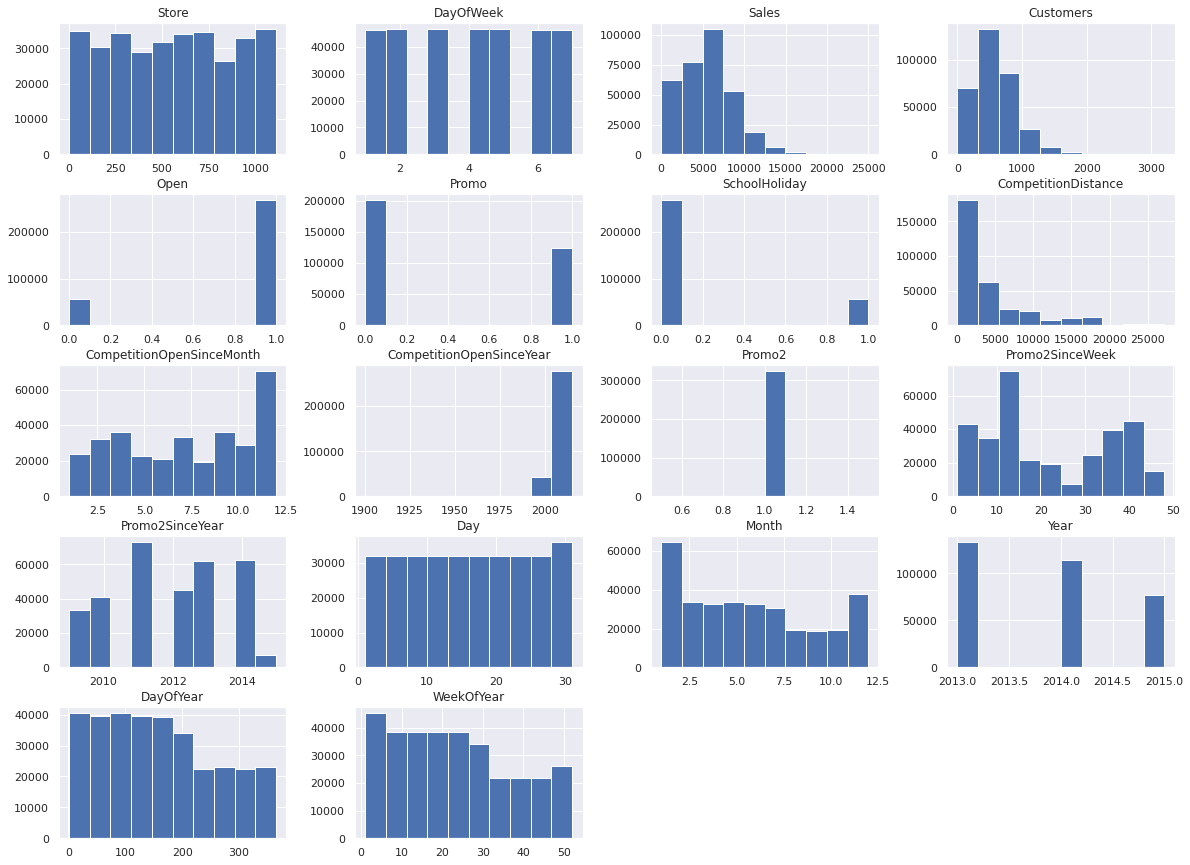

In [8]:
eda_train.plot_distributions()

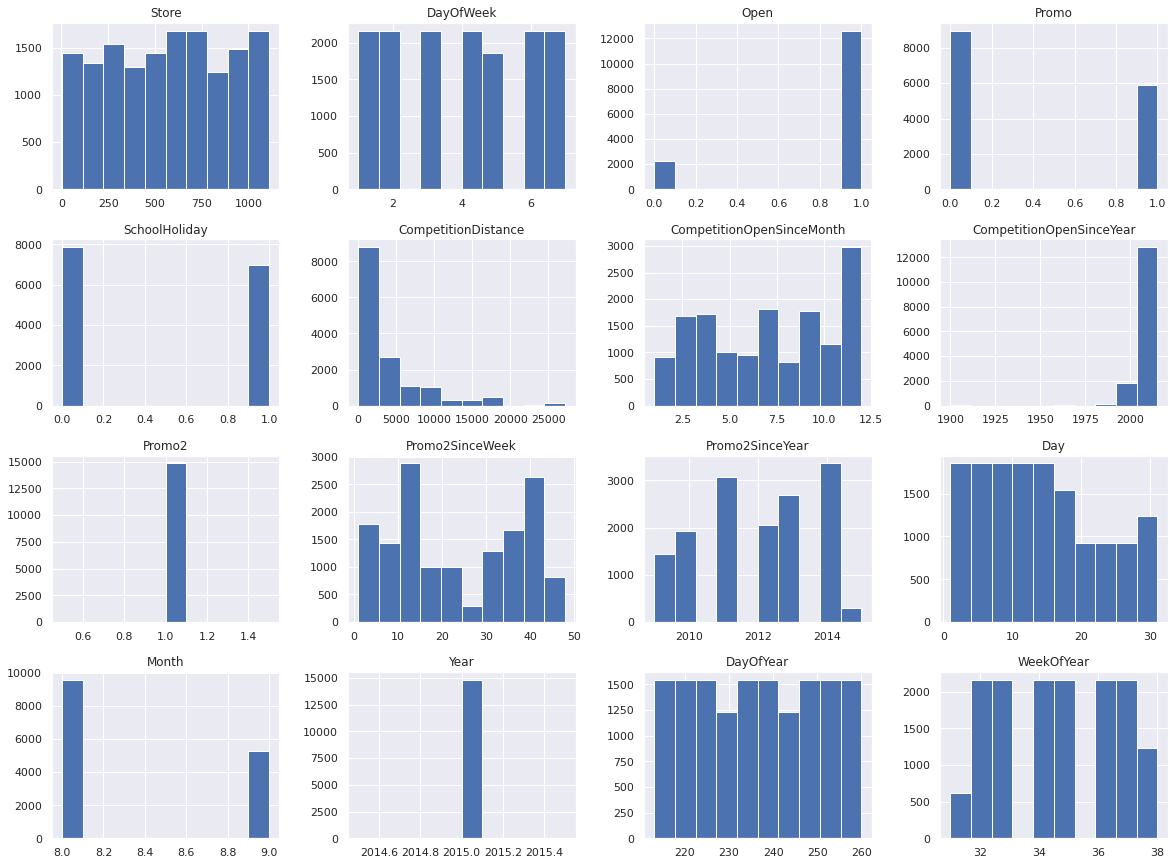

In [9]:
eda_test.plot_distributions()

No they are not similar, we see that there is differences in:
- day of week-slight difference in 4-5 in test set
- school holiday - difference in number of ones in test set
- promo 2 since week - has lower values in between the peaks in the test set
- promo 2 since year - has slight difference in year 2013 and 2014 
- day - has lower days towards the end in the test set
- month - has no values in between the peaks  in the test set
- year - centered only on one peak that is 2015
- day of year - has lower values towards the end in the train set
- week of year - has downward trend in the training set, while in the test set it tries to be consistent
- no customers and sales columns in test set

Check & compare sales behavior before, during and after holidays

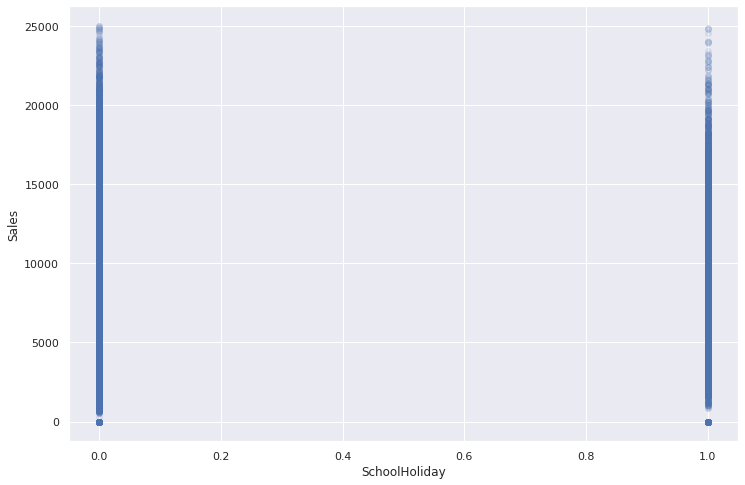

In [10]:
eda_train.plot_counts("SchoolHoliday","Sales","bivariate_scatter")

We can notice that before the holidays the sales that is when school holidays = 0, the sales are more but when there are school holidays, that is when holidays = 1, we notice that there is a decrease in the sales

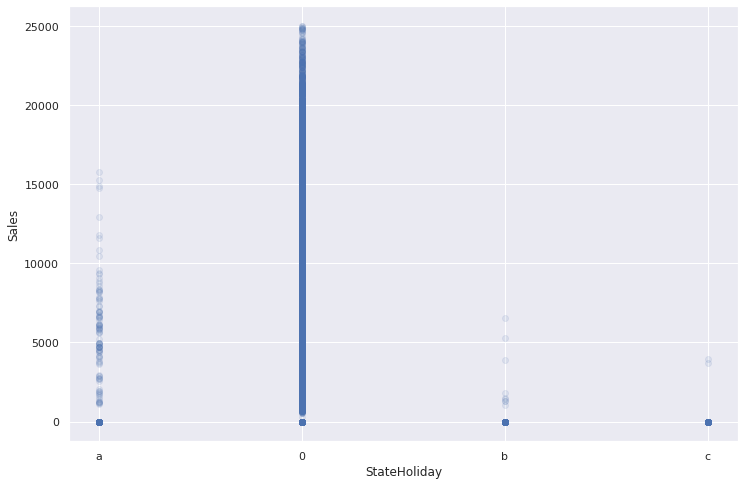

In [11]:
eda_train.plot_counts("StateHoliday","Sales","bivariate_scatter")

We can note that when there are no state holidays, that is when stateholiday = 0, there are more sales, and then we notice that during the state holidays, there are fewer sales, 

Find out any seasonal (Christmas, Easter etc) purchase behaviours,

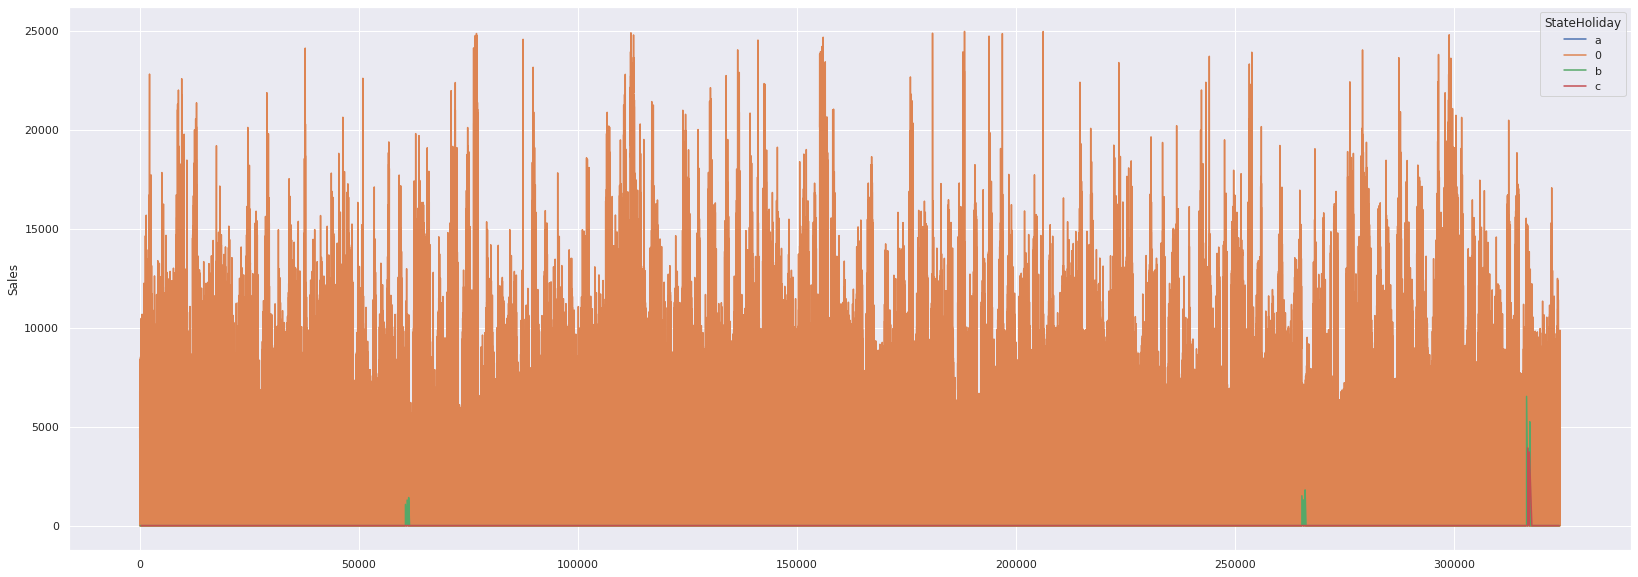

In [12]:
eda_train.plot_counts("Sales","StateHoliday","bivariate_line")

Noting that in the graph, we have a = public holiday, b = Easter holiday, c = Christmas, 0 = None, we notice that
most of the sales are done when stateholiday=0, but we notice that there is a strong decrease during the holidays,
that is very few sales are done during the public holidays,easter and christmas, However we can note that
in the easters there are more sales in the public holidays, than in the easter and christmas holidays, 
and that there are more sales in the easter holidays, than in the christmas holidays

What can you say about the correlation between sales and number of customers?

<Figure size 2016x720 with 0 Axes>

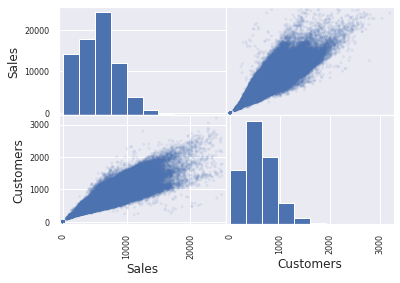

In [4]:
eda_train.correlation_analysis("Sales", "Customers","bivariate")

We notice that there is a high correlation between the customers, and the sales
and the relationship is a positive/direct type of relationship that is as the customers grow
likewise do the sales, but customers column/feature is not in the test set, therefore we can only use it in 
some analysis but not all

How does promo affect sales? Are the promos attracting more customers? 
How does it affect already existing customers?

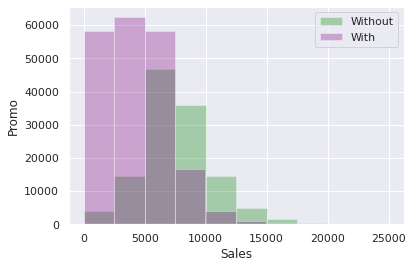

In [4]:
eda_train.plot_counts('Promo','Sales','bivariate_hist')

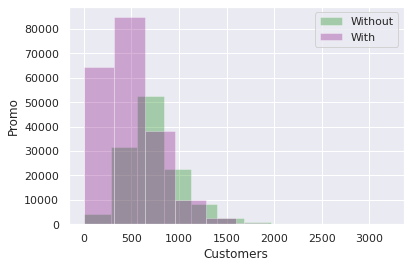

In [7]:
eda_train.plot_counts('Promo','Customers','bivariate_hist')

- Yes we can see there is a huge change once a promo is done, because of the huge distance overlaps in the bars in the with promo shade as compared to when there is not, so we can say that yes a promo attracts customers, however we note that this will happen for only the promos above 40000 which happen to fall in the sales that are lower than 5000
- We note that there is also some overlap, between the customers, and the promos that are slightly above 50,000 is where we see a consistency in how it affects those type of customers, therefore promos done to existing customers above a certain category(in our case 50000) and interesting thing is that this comprises of fewer customers of the range of (0-500), is more effective as compared to promos done to all existing customers.

Could the promos be deployed in more effective ways? Which stores should promos be deployed in?

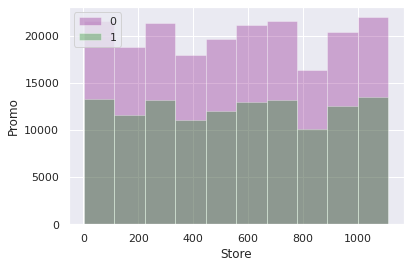

In [5]:
eda_train.plot_counts('Promo','Store','bivariate_hist')

In [7]:
np.unique(eda_train.between('Sales',15000,20000)['Store'])

array([   3,   11,   17,   24,   27,   28,   35,   52,   54,   58,   71,
         77,   82,  102,  120,  126,  137,  140,  146,  153,  156,  162,
        164,  166,  169,  181,  192,  199,  213,  214,  223,  229,  247,
        248,  256,  261,  272,  303,  308,  319,  323,  344,  368,  370,
        371,  372,  375,  377,  380,  381,  386,  391,  400,  401,  421,
        427,  434,  449,  450,  459,  479,  489,  492,  502,  503,  506,
        507,  518,  522,  534,  536,  539,  544,  545,  552,  571,  572,
        575,  587,  603,  605,  608,  612,  613,  616,  623,  629,  636,
        641,  643,  644,  655,  657,  665,  674,  677,  685,  695,  705,
        708,  711,  720,  721,  739,  745,  753,  754,  759,  765,  775,
        784,  792,  815,  822,  835,  846,  848,  862,  868,  869,  872,
        876,  897,  914,  926,  947,  954,  967,  971,  974,  983,  985,
        986,  993,  996,  999, 1003, 1010, 1011, 1019, 1023, 1026, 1027,
       1032, 1039, 1040, 1048, 1050, 1051, 1086, 10

Yes we see that for promos below 10000, there is no impact on the side of the stores, but for promos above 10,000 there is significant change in such stores, I would recomend that promos to be deployed in stores that are between the 15,000 - 20000 mark, that is the following stores
-       [3,   11,   17,   24,   27,   28,   35,   52,   54,   58,   71,
        77,   82,  102,  120,  126,  137,  140,  146,  153,  156,  162,
        164,  166,  169,  181,  192,  199,  213,  214,  223,  229,  247,
        248,  256,  261,  272,  303,  308,  319,  323,  344,  368,  370,
        371,  372,  375,  377,  380,  381,  386,  391,  400,  401,  421,
        427,  434,  449,  450,  459,  479,  489,  492,  502,  503,  506,
        507,  518,  522,  534,  536,  539,  544,  545,  552,  571,  572,
        575,  587,  603,  605,  608,  612,  613,  616,  623,  629,  636,
        641,  643,  644,  655,  657,  665,  674,  677,  685,  695,  705,
        708,  711,  720,  721,  739,  745,  753,  754,  759,  765,  775,
        784,  792,  815,  822,  835,  846,  848,  862,  868,  869,  872,
        876,  897,  914,  926,  947,  954,  967,  971,  974,  983,  985,
        986,  993,  996,  999, 1003, 1010, 1011, 1019, 1023, 1026, 1027,
        1032, 1039, 1040, 1048, 1050, 1051, 1086, 1092, 1099, 1107]

Trends of customer behavior during store open and closing times

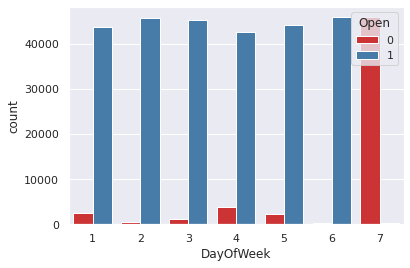

In [4]:
eda_train.plot_counts('DayOfWeek','Open','bivariate_count')

A huge percentage of the stores open on all weekdays, and close on weekends, this could probably be because many customers are not available during the weekend, also it could be that the store workers have closed for some rest. And we notice that there are some peak days like day 2 and 6.

Which stores are opened on all weekdays? How does that affect their sales on weekends?

In [9]:
open_weekdays_df = eda_train.get_df()[(eda_train.get_df()['Open'] == 1) & (eda_train.get_df()['DayOfWeek'] < 6)]

In [10]:
open_weekdays = eda_train.get_df()[(eda_train.get_df()['Open'] == 1) & (eda_train.get_df()['DayOfWeek'] < 6)]['Store']

In [11]:
stores_open_weekdays = np.unique(open_weekdays)

In [12]:
stores_open_weekdays

array([   2,    3,   11,   14,   15,   17,   18,   20,   21,   24,   27,
         28,   30,   35,   36,   39,   46,   47,   51,   52,   54,   56,
         58,   59,   61,   63,   65,   71,   72,   77,   78,   81,   82,
         86,   89,   96,   98,   99,  102,  115,  120,  121,  126,  127,
        133,  136,  137,  139,  140,  146,  149,  153,  156,  162,  164,
        165,  166,  169,  170,  177,  181,  186,  190,  191,  192,  196,
        198,  199,  204,  209,  210,  213,  214,  223,  229,  231,  232,
        235,  242,  244,  247,  248,  254,  255,  256,  258,  261,  263,
        266,  272,  275,  276,  280,  287,  295,  296,  300,  302,  303,
        305,  306,  308,  314,  317,  319,  321,  322,  323,  325,  326,
        329,  334,  337,  343,  344,  347,  351,  356,  361,  368,  370,
        371,  372,  375,  377,  380,  381,  386,  391,  399,  400,  401,
        402,  405,  406,  407,  410,  418,  421,  427,  428,  429,  434,
        440,  446,  449,  450,  451,  452,  459,  4

In [14]:
open_weekdays_ = EDA(open_weekdays_df)

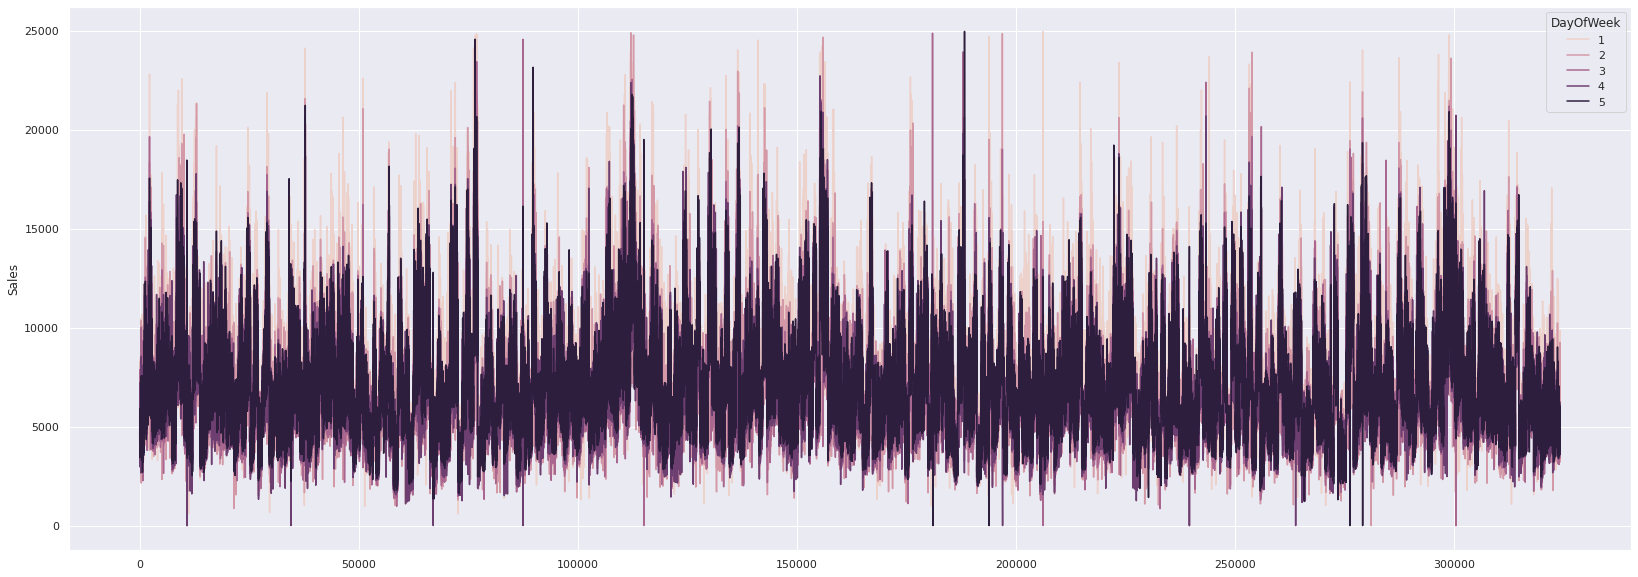

In [15]:
open_weekdays_.plot_counts("Sales","DayOfWeek","bivariate_line")

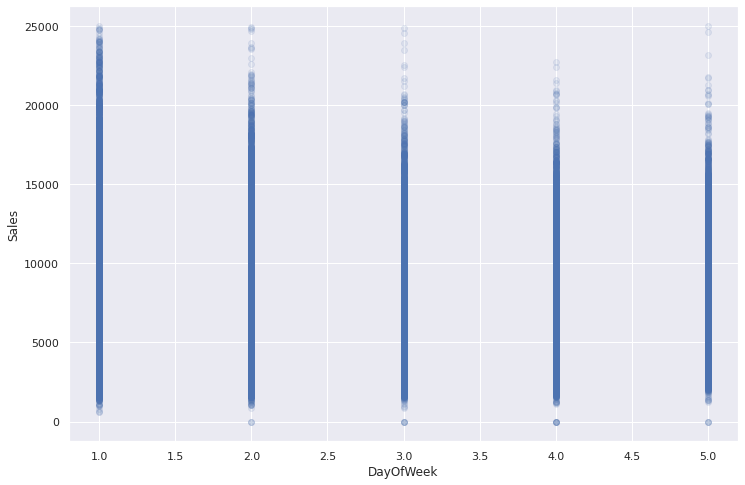

In [17]:
open_weekdays_.plot_counts("DayOfWeek","Sales","bivariate_scatter")

The following stores are all opened during the weekdays:
-      [2,    3,   11,   14,   15,   17,   18,   20,   21,   24,   27,
         28,   30,   35,   36,   39,   46,   47,   51,   52,   54,   56,
         58,   59,   61,   63,   65,   71,   72,   77,   78,   81,   82,
         86,   89,   96,   98,   99,  102,  115,  120,  121,  126,  127,
        133,  136,  137,  139,  140,  146,  149,  153,  156,  162,  164,
        165,  166,  169,  170,  177,  181,  186,  190,  191,  192,  196,
        198,  199,  204,  209,  210,  213,  214,  223,  229,  231,  232,
        235,  242,  244,  247,  248,  254,  255,  256,  258,  261,  263,
        266,  272,  275,  276,  280,  287,  295,  296,  300,  302,  303,
        305,  306,  308,  314,  317,  319,  321,  322,  323,  325,  326,
        329,  334,  337,  343,  344,  347,  351,  356,  361,  368,  370,
        371,  372,  375,  377,  380,  381,  386,  391,  399,  400,  401,
        402,  405,  406,  407,  410,  418,  421,  427,  428,  429,  434,
        440,  446,  449,  450,  451,  452,  459,  461,  477,  479,  483,
        487,  489,  490,  492,  500,  502,  503,  506,  507,  509,  514,
        518,  519,  521,  522,  534,  536,  537,  539,  542,  544,  545,
        547,  552,  553,  555,  559,  563,  567,  571,  572,  573,  575,
        587,  590,  597,  598,  600,  601,  602,  603,  605,  607,  608,
        611,  612,  613,  616,  619,  623,  625,  629,  633,  636,  641,
        642,  643,  644,  650,  653,  655,  656,  657,  660,  665,  669,
        671,  674,  675,  677,  685,  688,  694,  695,  701,  702,  705,
        706,  708,  710,  711,  712,  714,  716,  720,  721,  723,  737,
        739,  743,  744,  745,  746,  748,  749,  750,  752,  753,  754,
        759,  765,  775,  776,  777,  778,  782,  784,  785,  786,  792,
        797,  805,  815,  822,  825,  833,  835,  844,  845,  846,  848,
        850,  852,  857,  858,  862,  864,  868,  869,  872,  875,  876,
        881,  888,  897,  900,  902,  904,  908,  914,  915,  920,  924,
        925,  926,  931,  941,  946,  947,  953,  954,  955,  956,  967,
        969,  970,  971,  974,  977,  979,  983,  985,  986,  989,  993,
        994,  996,  997,  998,  999, 1000, 1003, 1006, 1009, 1010, 1011,
       1012, 1013, 1015, 1019, 1023, 1026, 1027, 1032, 1039, 1040, 1041,
       1044, 1048, 1049, 1050, 1051, 1062, 1071, 1072, 1074, 1077, 1086,
       1088, 1092, 1094, 1095, 1099, 1102, 1103, 1104, 1105, 1106, 1107,
       1109, 1111]

It seems that most people on Monday make many sales than any day of the week, because we can see that most of the stores have spiked up sales, on that particular day of the week, and as the values go by we note that sales keep decreasing and then there is a short spike on Friday. Why could that be the case?.. I want to believe that on Monday people have accumulated their interests from the weekend, and on Friday people are trying to purchase because that weekend they might need it and they find the store is closed. Or they could be traveling too or something of that sort.

Check how the assortment type affects sales

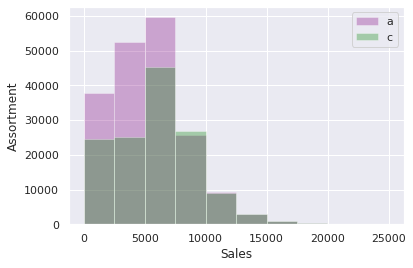

In [4]:
eda_train.plot_counts("Assortment","Sales","bivariate_hist")

In [ ]:
eda_train.get_df()[eda_train.get_df()['Assort']]

In [16]:
eda_train.get_df().head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year,DayOfYear,WeekOfYear
0,2,2,0,0,0,0,a,1,a,a,570.000,11.000,2007.000,1,13.000,2010.000,"Jan,Apr,Jul,Oct",1,1,2013,1,1
1,2,3,4422,650,1,0,0,1,a,a,570.000,11.000,2007.000,1,13.000,2010.000,"Jan,Apr,Jul,Oct",2,1,2013,2,1
2,2,4,4159,555,1,0,0,1,a,a,570.000,11.000,2007.000,1,13.000,2010.000,"Jan,Apr,Jul,Oct",3,1,2013,3,1
3,2,5,4484,574,1,0,0,1,a,a,570.000,11.000,2007.000,1,13.000,2010.000,"Jan,Apr,Jul,Oct",4,1,2013,4,1
4,2,6,2342,324,1,0,0,0,a,a,570.000,11.000,2007.000,1,13.000,2010.000,"Jan,Apr,Jul,Oct",5,1,2013,5,1
